## Inference

In [ ]:
!gdown 1--AJWPNySIn7nwExSkp-BrOVBzhw-BAi

Downloading...
From: https://drive.google.com/uc?id=1--AJWPNySIn7nwExSkp-BrOVBzhw-BAi
To: /content/ORG_Dataset.pt
100% 245M/245M [00:02<00:00, 106MB/s]


In [ ]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
# Load the trained model 
model = torch.load('/content/ORG_Dataset.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unet/log.csv')

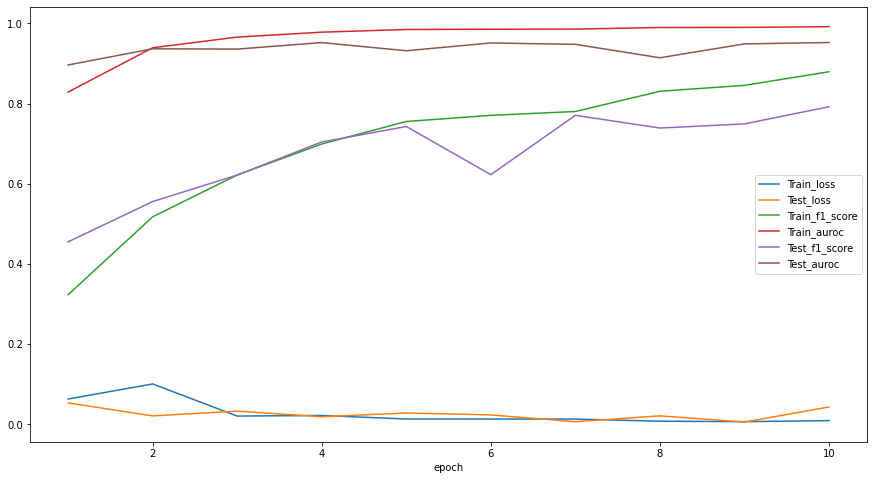

In [ ]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [ ]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.991965
Test_auroc     0.952477
dtype: float64


In [ ]:
ino = 2
# Read  a sample image and mask from the data-set
img = cv2.imread('//content/DeepLabv3FineTuning/make_data/label2/images/a_010.jpg').transpose(2,0,1).reshape(1,3,512,512)
mask = cv2.imread('/content/DeepLabv3FineTuning/make_data/label2/masks/a_010.jpg')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([132732.,  67538.,   4192.,   3156.,   3008.,   2847.,   3150.,
          5764.,  27827.,  11930.]),
 array([-0.15373439, -0.0321549 ,  0.08942459,  0.21100408,  0.33258355,
         0.45416304,  0.57574254,  0.697322  ,  0.8189015 ,  0.940481  ,
         1.0620605 ], dtype=float32),
 <a list of 10 Patch objects>)

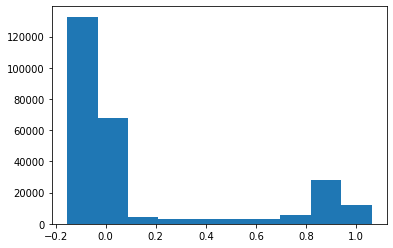

In [ ]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

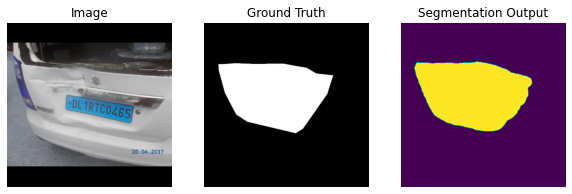

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./CFExp/SegmentationOutput.png',bbox_inches='tight')

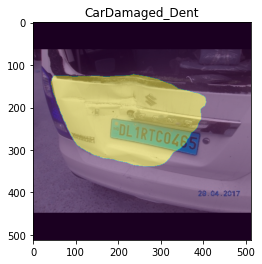

In [ ]:
img = cv2.imread('/content/DeepLabv3FineTuning/make_data/label2/images/a_010.jpg')
plt.imshow(img)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2, alpha=0.4);
plt.title('CarDamaged_Dent')
plt.show()

In [ ]:
test_img = cv2.imread('/content/test2.jpg')
test_img.shape

(360, 360, 3)

In [ ]:
ino = 2
# Read  a sample image and mask from the data-set
img = cv2.imread('/content/test2.jpg').transpose(2,0,1).reshape(1,3,360, 360)
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([36202., 66510.,  6389.,  2436.,  1644.,  1486.,  1600.,  2285.,
         9964.,  1084.]),
 array([-0.15517703, -0.02877913,  0.09761877,  0.22401667,  0.35041457,
         0.47681248,  0.6032104 ,  0.72960824,  0.85600615,  0.98240405,
         1.108802  ], dtype=float32),
 <a list of 10 Patch objects>)

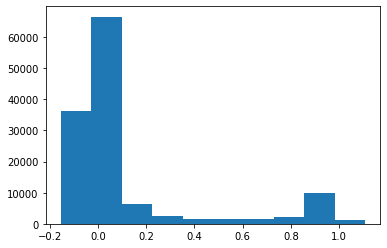

In [ ]:
plt.hist(a['out'].data.cpu().numpy().flatten())

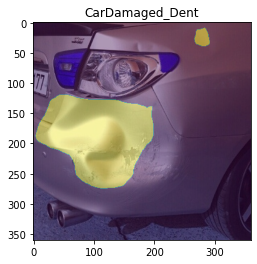

In [ ]:
img = cv2.imread('/content/test2.jpg')
plt.imshow(img)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2, alpha=0.4);
plt.title('CarDamaged_Dent')
plt.show()